##  Mon premier réseau de neurones appliqué aux données Iris

### <font color="orange">Si besoin installer les packages suivants :</font>
- !pip install pandas
- !pip install keras
- !pip install tensorflow
- !pip install sklearn
- !pip install matplotlib


In [1]:
!python --version

#pip list

Python 3.9.7


### <font color="orange">Charger les librairies</font>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Activation, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.metrics import F1Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### <font color="orange">Chargement des données Iris</font>
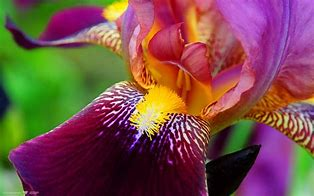

In [8]:
iris = load_iris()

In [9]:
# Vérifier la structure de l'objet iris
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
# Afficher les noms des variables explicatives
print(iris.feature_names)

# Afficher le nom de la variable cible
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [11]:
# Assigner à X les variables explicative et dans y la variable cible
X = iris.data
y = iris.target


In [12]:
# converir le "array" X en dataframe df_X et ajouter le nom des colonnes
df_X=pd.DataFrame(X,columns=iris.feature_names)

# Afficher les 10 premières lignes
df_X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
# Créer un dataframe df_y qui contient la colonne cible y
df_y=pd.DataFrame(y,columns=['target_y'])

# Afficher les 10 premières lignes de df_y
df_y.head(10)

,target_y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [14]:
# Ajouter à df_y une colonne "label" avec le nom des modalité de la cible
iris_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
# df_y = df_y.assign(y=df_y.target_y.map(iris_mapping))

# Afficher les 10 premières lignes de df_y avec la colonne "label"
df_y = df_y.assign(y=df_y.target_y.map(iris_mapping))

# Afficher les 10 premières lignes de df_y avec la colonne "label"

df_y.head(10)

,target_y,y
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
5,0,setosa
6,0,setosa
7,0,setosa
8,0,setosa
9,0,setosa


### <font color="orange">Visualiser les données Iris</font>

In [15]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_xkcd

In [16]:
# créer df_Xy qui contient les df_X et df_y

df_XY = pd.concat([df_X, df_y], axis=1)

p = (
    ggplot(df_XY, aes(x='sepal length (cm)', y='sepal width (cm)', color='y')) +
    geom_point() +
    labs(title='Iris Dataset: Sepal Width vs Sepal Length', x='Sepal Length (cm)', y='Sepal Width (cm)')
)

In [ ]:
### Rajouter la couleur en fonction du type de variété

df_XY=pd.concat([df_X,df_y],axis=1)
p = (

)

p

###  <font color="orange"> Modélisation:Deep learning </font>

#### <font color="blue"> A) Modèle avec 1 seul neurone en sortie </font>

##### Préparation des données

###### a) Filtrer les observations pour ne conserver que les variétés "Virginica" et "versicolor"

In [ ]:
df_y.groupby(['label', 'y']).size().reset_index(name='count')

In [ ]:
## supprimer les lignes correspondant à setosa
df_y2=df_y[df_y.label!="setosa"]
df_X2=df_X[df_y.label!="setosa"]

###### b) Binarisation de la variable cible avec la fonction "to_categorical"

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Apprentissage et transformation
y_recode = encoder.fit_transform()
y_recode = pd.DataFrame, columns=)
y_recode

In [ ]:
# Ne garder que la variable qui encode versicolor
y_recode=y_recode["label_versicolor"]
y_recode.rename("versicolor", inplace=True)
y_recode.head()

###### c) Créer les jeux de calibration & validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_X2, y_recode, test_size=0.30,  stratify=y_recode, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Construction du modèle

In [ ]:
# construction du modèle

# ajouter une couche d'entrée en précisant le nombre d'input

# ajouter la couche de sortie composé de 1 neurone avec une fonction d'activation sigmoïde


In [ ]:
# Afficher la structure du modèle


In [ ]:
# Préciser les paramètres d'optimisation du modèle (loss, optimizer et metrics)


In [ ]:
# Rajouter un Checkpoint pour sauvegarder le meilleur modèle selon la validation loss et éviter le surajustement
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
   'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


##### Ajustement du modèlesur les données d'entrainement

In [ ]:
history= model.fit()

##### Visualisation de l'ajustement et recheche du meilleur modèle

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_epoch =
print(f"Meilleur epoch selon validation loss : {best_epoch}")

In [ ]:
from keras.models import load_model

best_model = load_model()


In [ ]:
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")

##### Prédiction sur les données de test





In [ ]:
# Appliquer le modèle pour prédire les variétés des Iris du jeu de test et stoker dans "y_test_pred"
y_test_pred=
# créer un data frame df_y_test_pred
df_y_test_pred=pd.DataFrame(,columns=[''],index=y_test.index)
df_y_test_pred.head()

##### *Recoder les probabilités en "Virginica" et "Versicolor"*

In [ ]:
# ajouter une colonne label qui contient le nom de la variété : si prob < 0.5 "virginica" si prob >= 0.5 versicolor
df_y_test_pred =

##### *Ajouter les valeurs observées et les labels correspondant*

In [ ]:
# ajouter une colonne y_obs qui contient la vraie valeur y_test
df_y_test_pred['y_obs']=

# ajouter une colonne 'label_obs' qui contient le nom de la variété : si prob < 0.5 "virginica" si prob >= 0.5 versicolor
df_y_test_pred =
df_y_test_pred.head()

##### Evaluer la Performance du modèle

In [ ]:
##matrice de confusion
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
print("Matrice de confusion:")
cm =
print(pd.DataFrame(cm))
print(metrics.classification_report())

In [ ]:
model.get_weights()

##### Comparaison avec une régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression # import de la classe

modelrl = LogisticRegression(C=10^5) # construction d'un objet de Régression logistique
modelrl.fit(x_train, y_train) # Entrainement du modèle


In [ ]:
modelrl.coef_

In [ ]:
df_y_test_pred['ypred_lr']=modelrl.predict_proba(x_test)[:,1]

In [ ]:
df_y_test_pred.head(n=10)

In [ ]:

(
    ggplot(df_y_test_pred)
    + aes(x='prob', y='ypred_lr')
    + labs(
        x="nn",
        y="lr",
        title="comp. nn vs lr",
    )
    + geom_point()


)

**Quels sont vos commentaires ou remarques :**


*   
*   



#### <font color="blue"> B) Modèle avec 3 neurones en sortie : Setosa, Virginica et Versicolor </font>

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Apprentissage et transformation
y_recode = encoder.fit_transform(df_y[['label']])
y_recode = pd.DataFrame(y_recode.toarray(), columns=encoder.get_feature_names_out())
y_recode.head()

In [ ]:
y_recode.columns = iris.target_names
y_recode.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_X, y_recode, test_size=0.30,  stratify=y_recode, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# construction du modèle

# ajouter une couche d'entrée en précisant le nombre d'input

# Préciser les paramètres d'optimisation du modèle (loss, optimizer et metrics)



In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
   'best_model_2.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


In [ ]:
# ajustement du modèle (Enregistrer le temps CPU vs GPU)
#model.fit(x_train, y_train, batch_size=70, epochs=100, verbose=0)
history = model.fit()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from keras.models import load_model

best_model = load_model()

In [ ]:
# Appliquer le modèle pour prédire les variétés des Iris du jeu de test et stoker dans "y_test_pred"
y_test_pred=best_model.predict(x_test)

# créer un data frame df_y_test_pred
df_y_test_pred=pd.DataFrame(y_test_pred,columns=['setosa','versicolor','virginica'],index=y_test.index)
## selectionner la colonne qui a la plus grande probabilité
df_y_test_pred=df_y_test_pred.idxmax(axis="columns")
df_y_test=y_test.idxmax(axis="columns")

## concatener predictions et observées
df_y_test_pred= pd.concat([df_y_test,df_y_test_pred],keys=["obs","pred"],axis=1)
df_y_test_pred.head()

In [ ]:

print("Matrice de confusion:")
cm = confusion_matrix(df_y_test_pred.obs,df_y_test_pred.pred)
print(pd.DataFrame(cm))
print(metrics.classification_report(df_y_test_pred.obs, df_y_test_pred.pred, digits=3))

#### <font color="blue"> C) Modèle avec 1 couche cachée et 3 neurones en sortie : Setosa, Virginica et Versicolor</font>

In [ ]:
# Rajouter à votre modèle une couche cachée avec 3 neurones juste avant la couche de sortie et l'entrainer puis le valider.



In [ ]:
# Rajouter à votre modèle une couche drop out après chaque couche caché, qu'est ce que vous observez?